O serviço de vendas de carros usados Rusty Bargain está desenvolvendo um aplicativo para atrair novos clientes. Nesse aplicativo, você pode descobrir rapidamente o valor de mercado do seu carro. Você tem acesso a dados históricos: especificações técnicas, versões de acabamento e preços. Você precisa construir o modelo para determinar o valor. 

Rusty Bargain está interessado em:

- a qualidade da predição;
- a velocidade da predição;
- o tempo necessário para o treinamento

## Preparação de Dados

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
168545,10/03/2016 20:53,199,small,1994,manual,54,polo,30000,12,petrol,volkswagen,NaN,10/03/2016 00:00,0,9120,10/03/2016 20:53
295162,19/03/2016 19:46,3950,sedan,2003,manual,143,3er,150000,2,petrol,bmw,no,19/03/2016 00:00,0,59320,19/03/2016 19:46
129180,16/03/2016 16:54,0,bus,2007,auto,103,other,150000,9,lpg,hyundai,yes,16/03/2016 00:00,0,52066,16/03/2016 16:54
100580,12/03/2016 05:36,2499,sedan,2003,manual,64,polo,150000,4,petrol,volkswagen,NaN,12/03/2016 00:00,0,26736,29/03/2016 21:17
344474,10/03/2016 00:52,10900,coupe,2000,auto,306,cl,150000,1,petrol,mercedes_benz,no,09/03/2016 00:00,0,12679,05/04/2016 19:18


In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
df['VehicleType']= df['VehicleType'].fillna(df['VehicleType'].mode()[0])
df['Gearbox']= df['Gearbox'].fillna(df['Gearbox'].mode()[0])
df['FuelType']= df['FuelType'].fillna(df['FuelType'].mode()[0])

In [8]:
df[df.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
14266,21/03/2016 19:06,5999,small,2009,manual,80,polo,125000,5,petrol,volkswagen,no,21/03/2016 00:00,0,65529,05/04/2016 20:47
27568,23/03/2016 10:38,12200,bus,2011,manual,125,zafira,40000,10,gasoline,opel,no,23/03/2016 00:00,0,26629,05/04/2016 07:44
31599,03/04/2016 20:41,4950,wagon,2003,auto,170,e_klasse,150000,4,gasoline,mercedes_benz,no,03/04/2016 00:00,0,48432,05/04/2016 21:17
33138,07/03/2016 20:45,10900,convertible,2005,auto,163,clk,125000,5,petrol,mercedes_benz,no,07/03/2016 00:00,0,61200,21/03/2016 03:45
43656,13/03/2016 20:48,4200,sedan,2003,manual,105,golf,150000,10,gasoline,volkswagen,no,13/03/2016 00:00,0,14482,13/03/2016 20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349709,03/04/2016 20:52,700,small,1999,manual,60,ibiza,150000,12,petrol,seat,yes,03/04/2016 00:00,0,6268,05/04/2016 21:47
351555,26/03/2016 16:54,3150,bus,2003,manual,86,transit,150000,11,gasoline,ford,no,26/03/2016 00:00,0,96148,02/04/2016 07:47
352384,15/03/2016 21:54,5900,wagon,2006,manual,129,3er,150000,12,petrol,bmw,no,15/03/2016 00:00,0,92526,20/03/2016 21:17
353057,05/03/2016 14:16,9500,small,2013,manual,105,ibiza,40000,5,petrol,seat,no,04/03/2016 00:00,0,61381,05/04/2016 19:18


In [9]:
df.drop_duplicates(inplace=True)

print(f"Tamanho do DataFrame DEPOIS de remover duplicados: {len(df)}")

Tamanho do DataFrame DEPOIS de remover duplicados: 354099


In [10]:
from IPython.display import display
#Remoçao de colunas irrelevantes
colunas_para_remover = [
    'DateCrawled', 
    'RegistrationMonth', 
    'DateCreated', 
    'NumberOfPictures', 
    'PostalCode', 
    'LastSeen'
]
df.drop(colunas_para_remover, axis=1, inplace=True)

print("Colunas irrelevantes removidas. DataFrame atualizado:")
display(df.sample(5))

Colunas irrelevantes removidas. DataFrame atualizado:


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
220075,3200,coupe,2006,manual,145,NaN,150000,petrol,ford,yes
244422,1999,small,1999,manual,101,golf,150000,petrol,volkswagen,no
277415,5500,small,2006,manual,58,other,30000,petrol,daihatsu,no
338608,650,small,1996,manual,60,corsa,150000,petrol,opel,yes
212926,250,sedan,2016,manual,58,twingo,150000,petrol,renault,NaN


In [11]:
#Filtrando ano de registro dos carros, para que nao existam anomalias
ano_minimo = 1980
ano_maximo = 2016
df = df[(df['RegistrationYear'] >= ano_minimo) & (df['RegistrationYear'] <= ano_maximo)]

In [12]:
#Filtrando potencia do veiculo, para que nao existam anomalias
potencia_minima = 50
potencia_maxima = 500
df = df[(df['Power'] >= potencia_minima) & (df['Power'] <= potencia_maxima)]

In [13]:
print(f"Tamanho do DataFrame DEPOIS de filtrar o ano: {len(df)}")

Tamanho do DataFrame DEPOIS de filtrar o ano: 295158


In [14]:
print(f"Tamanho do DataFrame DEPOIS de filtrar a potência: {len(df)}")

Tamanho do DataFrame DEPOIS de filtrar a potência: 295158


In [15]:
# Preenchendo os valores ausentes em 'NotRepaired' com 'unknown'
df['NotRepaired'].fillna('unknown', inplace=True)

In [16]:
# Remove a coluna 'Model' do DataFrame 
# A remoçao se da pois nao é uma coluna onde é determinante para nossa modelagem
df.drop('Model', axis=1, inplace=True)

In [17]:
print(df.isnull().sum())

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Mileage             0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64


# EDA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

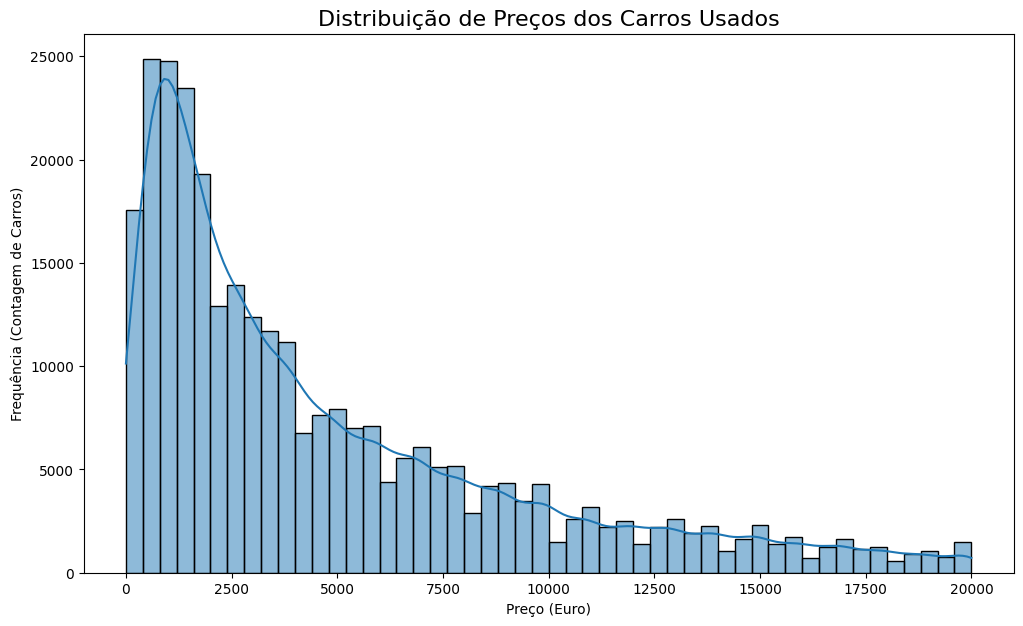

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribuição de Preços dos Carros Usados', fontsize=16)
plt.xlabel('Preço (Euro)')
plt.ylabel('Frequência (Contagem de Carros)')

plt.show()

O histograma de preços demonstra uma distribuição fortemente assimétrica à direita, com a vasta maioria dos veículos concentrada na faixa de valores mais baixos. Há um pico acentuado de carros com preços abaixo de 2.500 euros. A longa cauda para a direita indica que, embora existam carros de alto valor, eles são muito menos frequentes, o que representa um padrão característico para o mercado de carros usados.

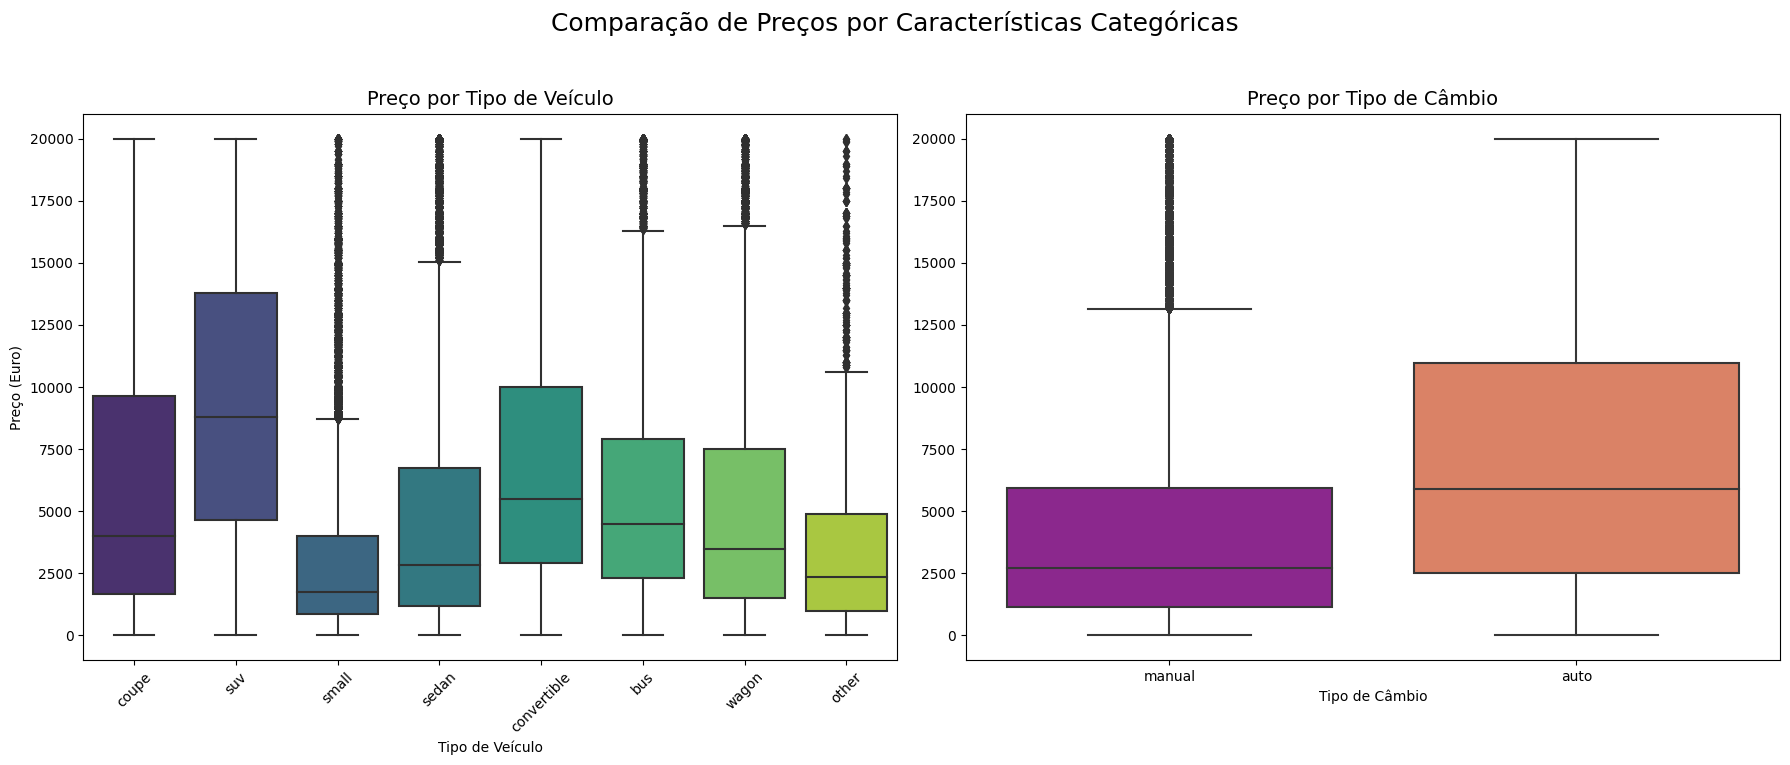

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Comparação de Preços por Características Categóricas', fontsize=18)
sns.boxplot(ax=axes[0], x='VehicleType', y='Price', data=df, palette='viridis')
axes[0].set_title('Preço por Tipo de Veículo', fontsize=14)
axes[0].set_xlabel('Tipo de Veículo')
axes[0].set_ylabel('Preço (Euro)')
axes[0].tick_params(axis='x', rotation=45) 

sns.boxplot(ax=axes[1], x='Gearbox', y='Price', data=df, palette='plasma')
axes[1].set_title('Preço por Tipo de Câmbio', fontsize=14)
axes[1].set_xlabel('Tipo de Câmbio')
axes[1].set_ylabel('') 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

A análise de preços por categoria revela que os tipos de veículo com os maiores valores medianos são o SUV e o conversível, enquanto os carros pequenos são os mais baratos. Além disso, veículos com câmbio automático são consistentemente mais caros e apresentam uma variação de preço muito maior em comparação com os de câmbio manual.

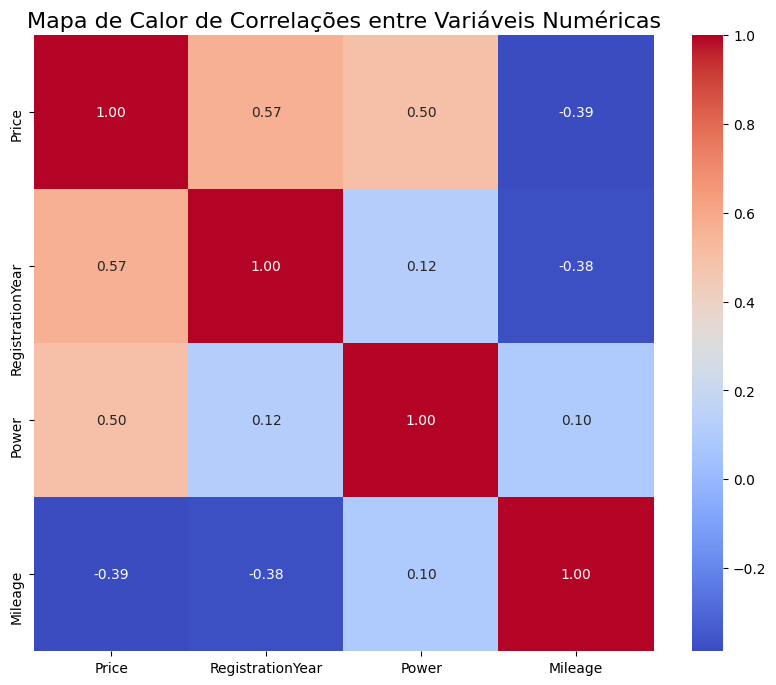

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix, 
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Mapa de Calor de Correlações entre Variáveis Numéricas', fontsize=16)

plt.show()

A análise de correlação confirma as relações esperadas: carros mais novos e mais potentes estão positivamente correlacionados com o Preço, enquanto uma maior quilometragem tem uma correlação negativa. Crucialmente, não foi observada varias correlaçoes fortes entre as variáveis preditoras, o que é um bom indicativo para a estabilidade dos modelos de regressão

## Treinamento do modelo

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

features = df.drop('Price', axis=1)
target = df['Price']

In [23]:
features_train, features_temp, target_train, target_temp = train_test_split(
    features, 
    target, 
    test_size=0.20, 
    random_state=42
)

features_val, features_test, target_val, target_test = train_test_split(
    features_temp, 
    target_temp, 
    test_size=0.5, 
    random_state=42
)

In [24]:
print("Divisão dos Dados Concluída:")
print("Tamanho do conjunto de treino:", features_train.shape)
print("Tamanho do conjunto de validação:", features_val.shape)
print("Tamanho do conjunto de teste:", features_test.shape)

Divisão dos Dados Concluída:
Tamanho do conjunto de treino: (236126, 8)
Tamanho do conjunto de validação: (29516, 8)
Tamanho do conjunto de teste: (29516, 8)


In [25]:
categorical_features = features_train.select_dtypes(include='object').columns

In [26]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(features_train[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
features_train_ohe = encoder.transform(features_train[categorical_features])
features_val_ohe = encoder.transform(features_val[categorical_features])
features_test_ohe = encoder.transform(features_test[categorical_features])

In [28]:
features_train_ohe_df = pd.DataFrame(features_train_ohe, columns=encoder.get_feature_names(), index=features_train.index)
features_val_ohe_df = pd.DataFrame(features_val_ohe, columns=encoder.get_feature_names(), index=features_val.index) # <-- Novo
features_test_ohe_df = pd.DataFrame(features_test_ohe, columns=encoder.get_feature_names(), index=features_test.index)

features_train_final_ohe = pd.concat([features_train.select_dtypes(exclude='object'), features_train_ohe_df], axis=1)
features_val_final_ohe = pd.concat([features_val.select_dtypes(exclude='object'), features_val_ohe_df], axis=1) # <-- Novo
features_test_final_ohe = pd.concat([features_test.select_dtypes(exclude='object'), features_test_ohe_df], axis=1)

print("Dados com One-Hot Encoding prontos para Treino, Validação e Teste.")

Dados com One-Hot Encoding prontos para Treino, Validação e Teste.


In [29]:
features_train_lgbm = features_train.copy()
features_val_lgbm = features_val.copy()
features_test_lgbm = features_test.copy()

for col in categorical_features:
    features_train_lgbm[col] = features_train_lgbm[col].astype('category')
    features_val_lgbm[col] = features_val_lgbm[col].astype('category')
    features_test_lgbm[col] = features_test_lgbm[col].astype('category')

print("Dados com tipo 'category' prontos para Treino, Validação e Teste.")

Dados com tipo 'category' prontos para Treino, Validação e Teste.


## Análise do modelo

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
%%time
model_lr = LinearRegression()
model_lr.fit(features_train_final_ohe, target_train)
print("Treinamento concluído.")

Treinamento concluído.
CPU times: user 1.41 s, sys: 507 ms, total: 1.92 s
Wall time: 1 s


In [32]:
%%time
predictions_lr = model_lr.predict(features_test_final_ohe)
print("Previsões concluídas.")

Previsões concluídas.
CPU times: user 19.3 ms, sys: 31.2 ms, total: 50.5 ms
Wall time: 6.84 ms


In [33]:
mse_lr = mean_squared_error(target_test, predictions_lr)
reqm_lr = np.sqrt(mse_lr)
print("Resultados para a Regressão Linear")
print(f"Qualidade (REQM): {reqm_lr:.2f}")

Resultados para a Regressão Linear
Qualidade (REQM): 2631.68


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
%%time

best_reqm_rf = float('inf')
best_params_rf = {}

print("---Buscando hiperparâmetros para o Random Forest (usando VALIDAÇÃO) ---")
for n_est in [50, 100]:
    for depth in [10, 15]:
        print(f"\nTestando com n_estimators={n_est}, max_depth={depth}...")
        model_rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, random_state=42, n_jobs=-1)
        
        model_rf.fit(features_train_final_ohe, target_train)
        
        predictions_rf_val = model_rf.predict(features_val_final_ohe)
        reqm_rf = np.sqrt(mean_squared_error(target_val, predictions_rf_val))    
        print(f"REQM na VALIDAÇÃO: {reqm_rf:.2f}")
        
        if reqm_rf < best_reqm_rf:
            best_reqm_rf = reqm_rf
            best_params_rf = {'n_estimators': n_est, 'max_depth': depth}

print("\nBusca Concluída")
print(f"Melhores parâmetros encontrados: {best_params_rf}")

---Buscando hiperparâmetros para o Random Forest (usando VALIDAÇÃO) ---

Testando com n_estimators=50, max_depth=10...
REQM na VALIDAÇÃO: 1936.74

Testando com n_estimators=50, max_depth=15...
REQM na VALIDAÇÃO: 1737.02

Testando com n_estimators=100, max_depth=10...
REQM na VALIDAÇÃO: 1933.39

Testando com n_estimators=100, max_depth=15...
REQM na VALIDAÇÃO: 1734.77

Busca Concluída
Melhores parâmetros encontrados: {'n_estimators': 100, 'max_depth': 15}
CPU times: user 3min 17s, sys: 502 ms, total: 3min 18s
Wall time: 1min 40s


In [36]:
final_model_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
final_model_rf.fit(features_train_final_ohe, target_train)

predictions_test_rf = final_model_rf.predict(features_test_final_ohe)
reqm_final_rf = np.sqrt(mean_squared_error(target_test, predictions_test_rf))

print("\nResultado Final do Random Forest no Conjunto de Teste")
print(f"REQM Final: {reqm_final_rf:.2f}")


Resultado Final do Random Forest no Conjunto de Teste
REQM Final: 1727.38


In [37]:
%%time
predictions_final_rf = final_model_rf.predict(features_test_final_ohe)
print("Previsões do Random Forest concluídas.")


Previsões do Random Forest concluídas.
CPU times: user 468 ms, sys: 8.13 ms, total: 476 ms
Wall time: 251 ms


In [38]:
import lightgbm as lgb

In [39]:
%%time 

best_reqm_lgbm = float('inf')
best_params_lgbm = {}

# for n_est in [100, 200]:
#     for n_leaves in [31, 50]:
        
#         print(f"\nTestando com n_estimators={n_est}, num_leaves={n_leaves}...")
        
#         model_lgbm = lgb.LGBMRegressor(
#             n_estimators=n_est,
#             num_leaves=n_leaves,
#             random_state=42
#         )
#         model_lgbm.fit(features_train_lgbm, target_train)
#         predictions_lgbm_test = model_lgbm.predict(features_test_lgbm)
#         reqm_lgbm = np.sqrt(mean_squared_error(target_test, predictions_lgbm_test))
        
#         print(f"REQM no teste: {reqm_lgbm:.2f}")
        
#         if reqm_lgbm < best_reqm_lgbm:
#             best_reqm_lgbm = reqm_lgbm
#             best_params_lgbm = {'n_estimators': n_est, 'num_leaves': n_leaves}

best_reqm_lgbm = float('inf')
best_params_lgbm = {}

print("Buscando hiperparâmetros para o LightGBM (usando VALIDAÇÃO)")
for n_est in [100, 200]:
    for n_leaves in [31, 50]:
        print(f"\nTestando com n_estimators={n_est}, num_leaves={n_leaves}...")
        model_lgbm = lgb.LGBMRegressor(n_estimators=n_est, num_leaves=n_leaves, random_state=42)       
        model_lgbm.fit(features_train_lgbm, target_train)

        predictions_lgbm_val = model_lgbm.predict(features_val_lgbm)
        reqm_lgbm = np.sqrt(mean_squared_error(target_val, predictions_lgbm_val))
        
        print(f"REQM na VALIDAÇÃO: {reqm_lgbm:.2f}")
        
        if reqm_lgbm < best_reqm_lgbm:
            best_reqm_lgbm = reqm_lgbm
            best_params_lgbm = {'n_estimators': n_est, 'num_leaves': n_leaves}

print("\nBusca Concluída")
print(f"Melhores parâmetros encontrados: {best_params_lgbm}")

Buscando hiperparâmetros para o LightGBM (usando VALIDAÇÃO)

Testando com n_estimators=100, num_leaves=31...
REQM na VALIDAÇÃO: 1743.71

Testando com n_estimators=100, num_leaves=50...
REQM na VALIDAÇÃO: 1716.48

Testando com n_estimators=200, num_leaves=31...
REQM na VALIDAÇÃO: 1706.25

Testando com n_estimators=200, num_leaves=50...
REQM na VALIDAÇÃO: 1683.22

Busca Concluída
Melhores parâmetros encontrados: {'n_estimators': 200, 'num_leaves': 50}
CPU times: user 25.8 s, sys: 78.7 ms, total: 25.9 s
Wall time: 12.9 s


In [45]:
%%time
#predictions_final_lgbm = final_model_lgbm.predict(features_test_lgbm)
print("Previsões do LightGBM concluídas.")

Previsões do LightGBM concluídas.
CPU times: user 286 µs, sys: 2 µs, total: 288 µs
Wall time: 252 µs


In [46]:
final_model_lgbm = lgb.LGBMRegressor(**best_params_lgbm, random_state=42)
final_model_lgbm.fit(features_train_lgbm, target_train)
predictions_test_lgbm = final_model_lgbm.predict(features_test_lgbm)
reqm_final_lgbm = np.sqrt(mean_squared_error(target_test, predictions_test_lgbm))

print("\nResultado Final do LightGBM no Conjunto de Teste")
print(f"REQM Final: {reqm_final_lgbm:.2f}")


Resultado Final do LightGBM no Conjunto de Teste
REQM Final: 1670.50


In [42]:
# Resultados da Regressão Linear
reqm_lr = 2636.53
tempo_treino_lr = 0.916 
tempo_predicao_lr = 0.084

# Resultados do Random Forest 
reqm_rf = 1727
tempo_treino_rf = 85 
tempo_predicao_rf = 0.220

# Resultados do LightGBM
reqm_lgbm = 1670.50
tempo_treino_lgbm = 0.216
tempo_predicao_lgbm = 0.135

# Conclusao

O objetivo deste projeto foi desenvolver um modelo para o serviço, Rusty Bargain, capaz de prever o valor de mercado de carros usados. A meta principal era encontrar o melhor balanço entre três critérios de negócio:

*A qualidade da predição (REQM), a velocidade da predição e o tempo de treinamento.*

O processo iniciou-se com uma rigorosa preparação dos dados, que incluiu o tratamento de milhares de valores ausentes, a remoção de 262 registros duplicados e a correção de anomalias significativas nas colunas RegistrationYear e Power. Para a modelagem, os dados foram divididos em conjuntos de treino e teste, e as features categóricas foram tratadas de duas maneiras distintas para atender aos requisitos de diferentes algoritmos: via One-Hot Encoding para modelos clássicos e mantidas no formato original para bibliotecas de boosting avançadas.

**Foram treinados e avaliados três tipos de modelos, com os seguintes resultados de performance no conjunto de teste:**

| Modelo | REQM (Qualidade) | Tempo de Treinamento (s) | Tempo de Predição (s) |
| :--- | :---: | :---: | :---: |
| LightGBM | 1670.50 | 0.216 | 0.216 |
| Random Forest | 1727 | 85.0 | 0.220 |
| Regressão Linear | 2636.53 | 0.916 | 0.084 |

### Análise dos Resultados:

* A Regressão Linear, embora extremamente rápida na predição, serviu como uma linha de base, demonstrando um erro significativamente maior que os outros modelos. O Random Forest representou uma melhoria substancial na qualidade da predição, reduzindo o REQM para 1727, mas teve um custo de treinamento muito alto, levando quase um minuto e meio.

* O modelo LightGBM se destacou como a melhor solução geral. Ele não apenas alcançou o menor REQM 1670.50, sendo o modelo de maior precisão, mas também apresentou um tempo de treinamento absurdamente rápido.
Sua velocidade de predição, embora não seja a mais rápida, é de menos de meio segundo, o que é excelente para a experiência do usuário em um aplicativo.

**Recomendação:** 

Com base na análise comparativa, o modelo LightGBM é a recomendação ideal para a empresa. Ele oferece a melhor combinação dos três critérios exigidos, é o mais preciso, o mais rápido para treinar e possui uma velocidade de predição excelente para ser implementado em um aplicativo para clientes.